In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import copy

In [3]:
#opening json file
f = open('data/5111408/5111408_events.json')

#return json object as dictionary

data = json.load(f)

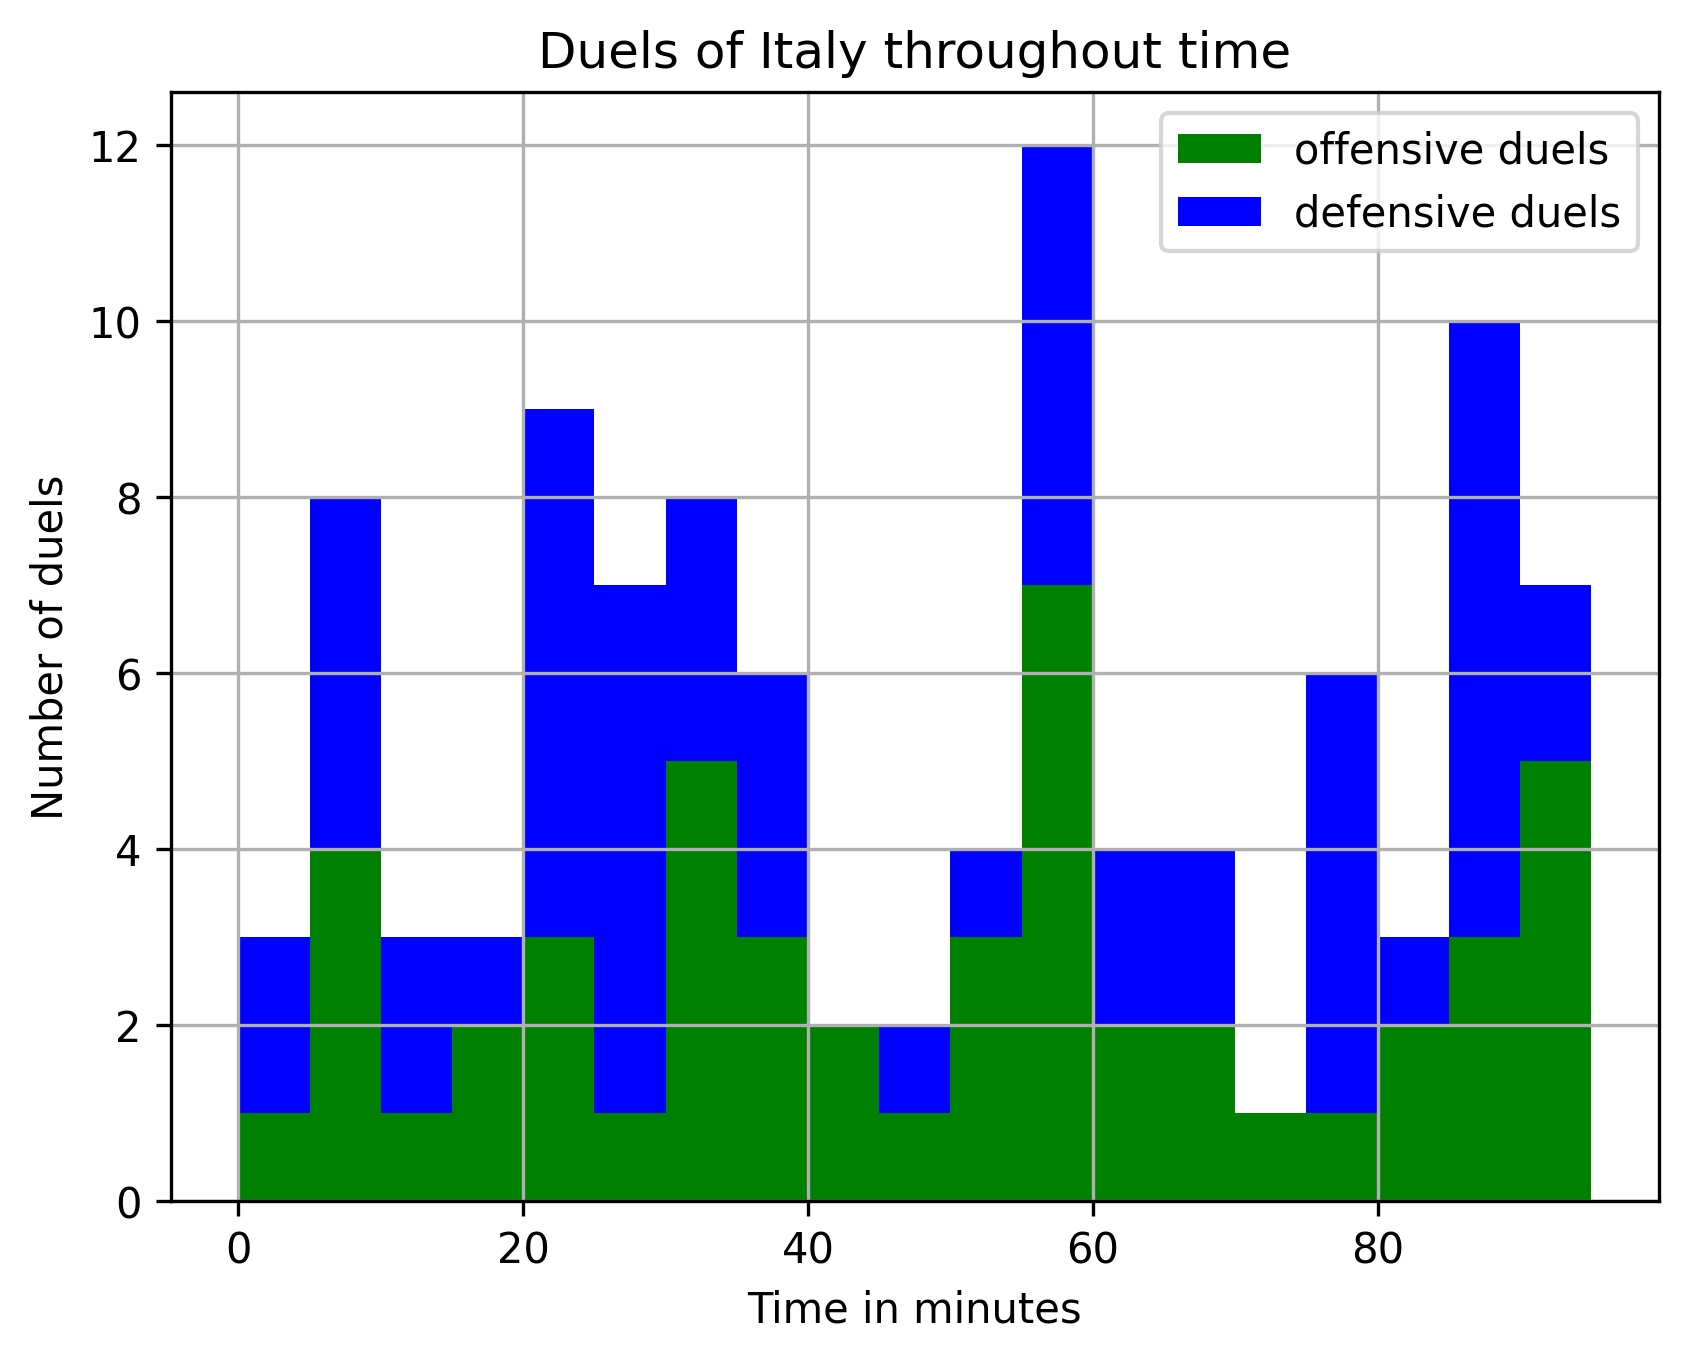

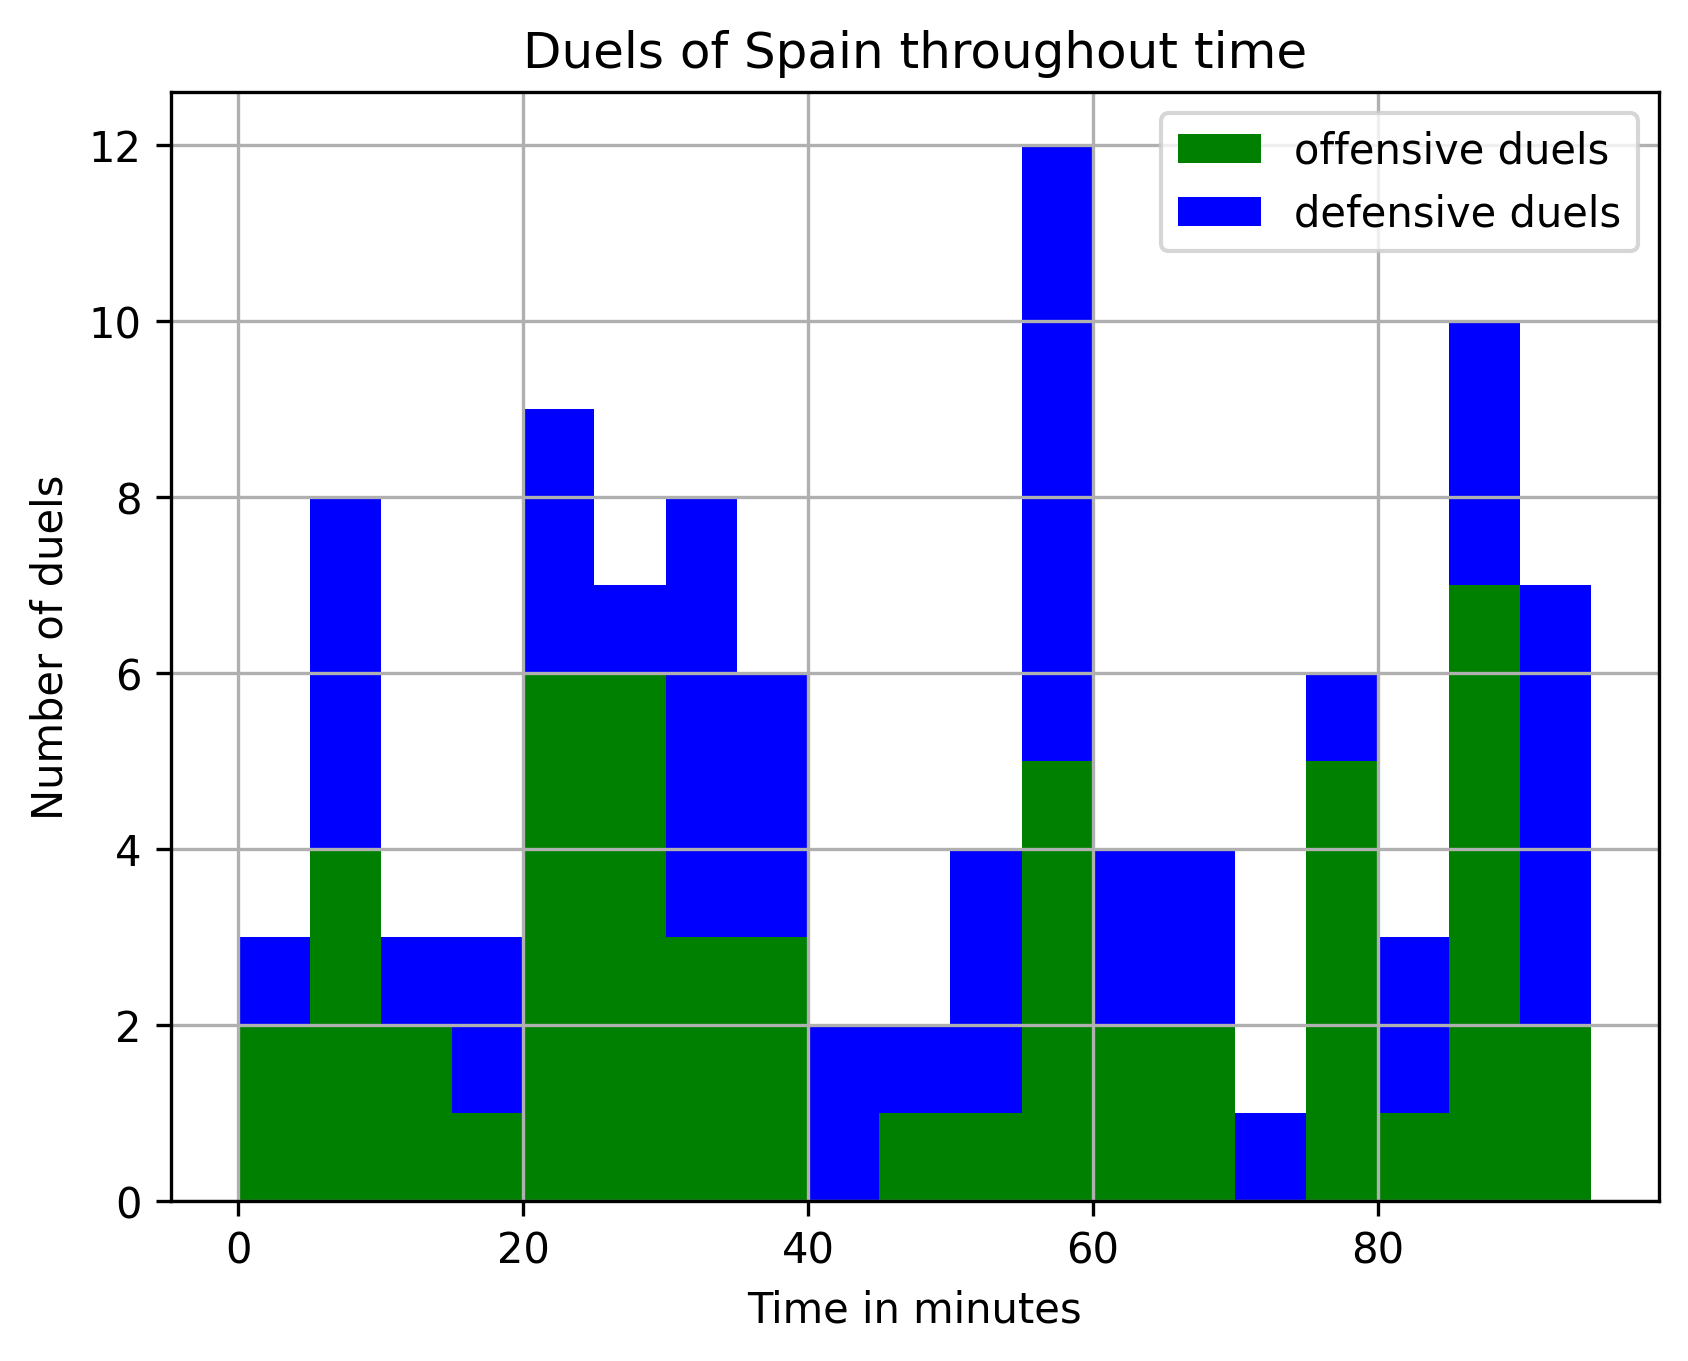

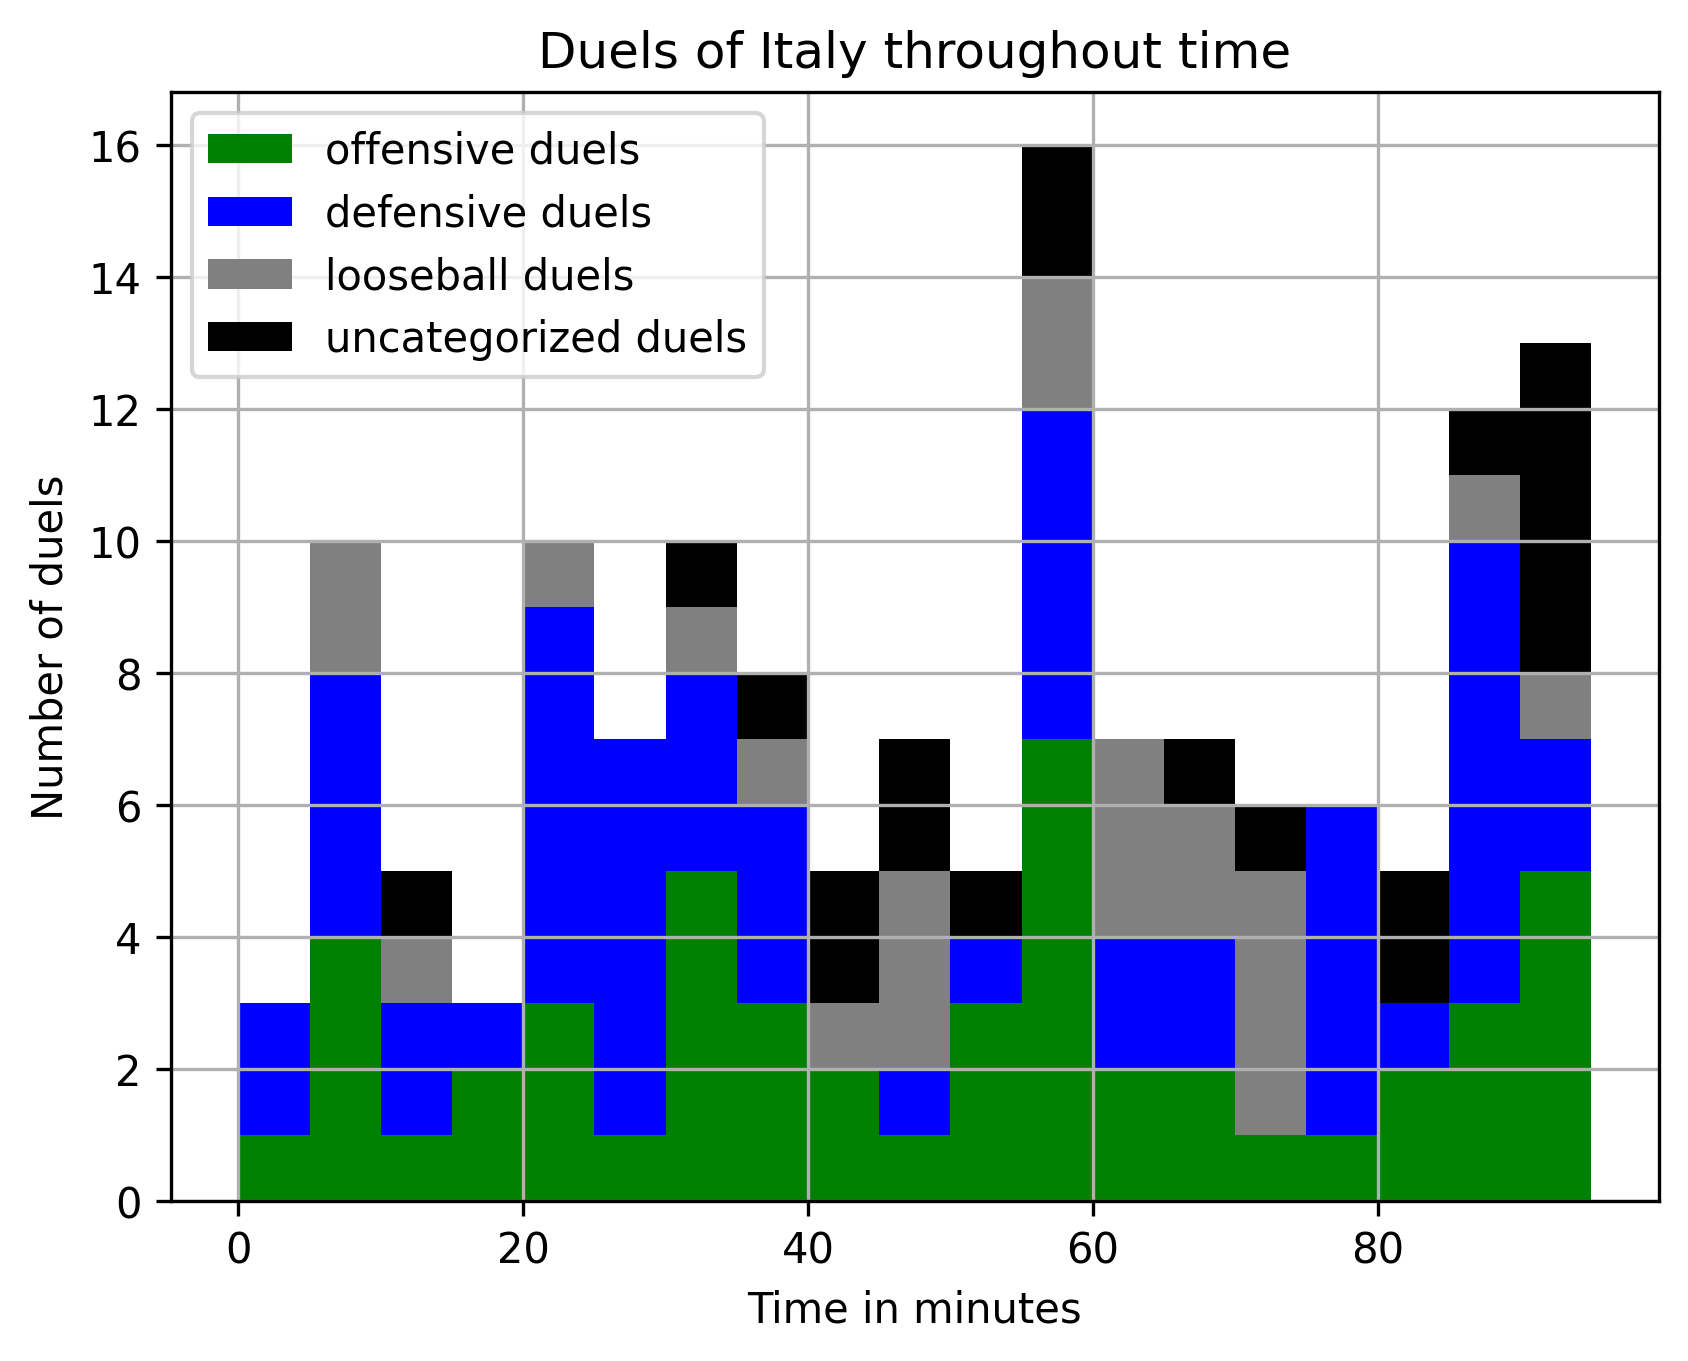

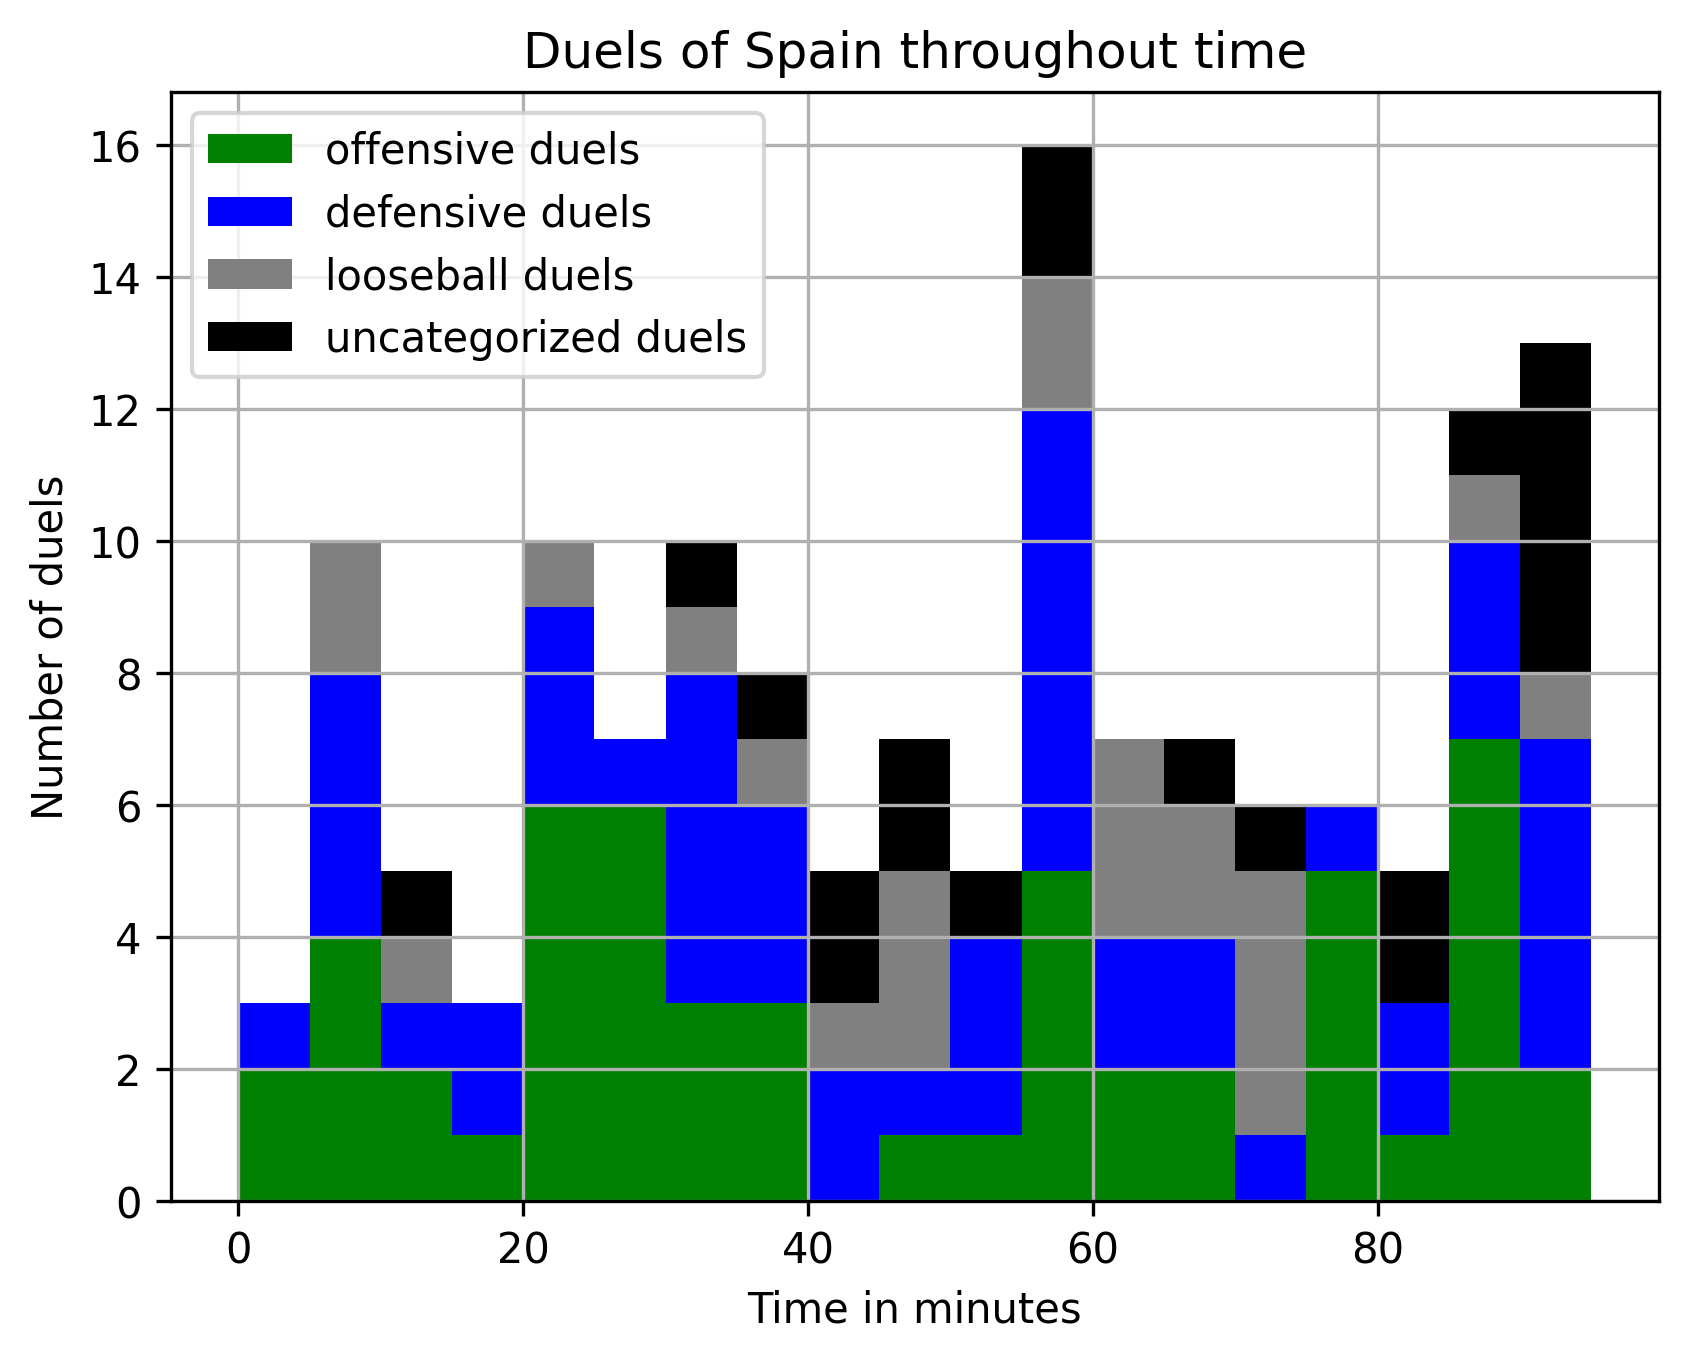

In [4]:
team_away_id =  1598  #spain
team_home_id =  3757  #italy

team_away_name = 'Spain' #put your countries names respectively
team_home_name = 'Italy'

def assign_type (sec):
        
    typ = 'none'
    
    for string in sec :
       if string == 'loose_ball_duel' :
           typ = string
           return typ

    for string in sec :
       if string == 'defensive_duel' :
           typ = string
           return typ

    for string in sec :
       if string == 'offensive_duel' :
           typ = string
           return typ        
    
    return typ
   

away_defensive_duel = np.array([])
away_offensive_duel = np.array([])
away_looseball_duel = np.array([])
away_uncategorized_duel = np.array([])

home_defensive_duel = np.array([])
home_offensive_duel = np.array([])
home_looseball_duel = np.array([])
home_uncategorized_duel = np.array([])

for e in data['events']:  
  

    duel = e['type']['primary'] 
    
    if duel is not None :
        if duel == 'duel':        
        
                 
            
            second = e['second']
            minute = e['minute']
            time_in_sec = second + 60 * minute
            time_in_min = time_in_sec/60
            
            x = e['location'][ 'x' ] 
            y = e['location']['y']
            
            teamid  = e['team']['id']
            
            secondary = e['type']['secondary']#secondary[0] = defensive_duel/ offensive duel / loose_ball_duel secondary[1] = ground_duel / aerial_duel
            
            typ = assign_type(secondary)
            
            
            
            
            if  teamid == team_away_id:
                if typ == 'loose_ball_duel':
                    away_looseball_duel = np.append(away_looseball_duel, time_in_min)
                elif typ == 'defensive_duel':
                    away_defensive_duel = np.append(away_defensive_duel, time_in_min)
                elif typ == 'offensive_duel':
                    away_offensive_duel = np.append(away_offensive_duel, time_in_min)
                elif typ == 'none':
                    away_uncategorized_duel = np.append(away_uncategorized_duel, time_in_min)
                    
            if teamid == team_home_id:
                if typ == 'loose_ball_duel':
                    home_looseball_duel = np.append(home_looseball_duel, time_in_min)
                elif typ == 'defensive_duel':
                    home_defensive_duel = np.append(home_defensive_duel, time_in_min)
                elif typ == 'offensive_duel':
                    home_offensive_duel = np.append(home_offensive_duel, time_in_min)
                elif typ == 'none':
                    home_uncategorized_duel = np.append(home_uncategorized_duel, time_in_min)            
                
     
            continue
    
    
        
        
           
        
        

mybins = np.arange(0,100,5)  

#those are the plots that are just offensive vs defensive

#to save as a picture you can just add: plt.savefig(myfilename.png)

plt.figure(dpi = 300)
n, bins, patches = plt.hist([home_offensive_duel, home_defensive_duel], bins=mybins, 
                            label = ['offensive duels','defensive duels'], 
                             stacked=True, color = ['green', 'blue'])
plt.xlabel('Time in minutes')
plt.ylabel('Number of duels')
title = "Duels of " + team_home_name + " throughout time"
plt.title(title)

plt.legend()
plt.grid(True)
plt.show()


plt.figure(dpi = 300)
n, bins, patches = plt.hist([away_offensive_duel, away_defensive_duel], bins=mybins, 
                            label = ['offensive duels','defensive duels'], 
                             stacked=True, color = ['green', 'blue'])
plt.xlabel('Time in minutes')
plt.ylabel('Number of duels')
title = "Duels of " + team_away_name + " throughout time"
plt.title(title)

plt.legend()
plt.grid(True)
plt.show()

#those are the plots with all the duels

plt.figure(dpi = 300)
n, bins, patches = plt.hist([home_offensive_duel, home_defensive_duel, home_looseball_duel, home_uncategorized_duel], bins=mybins, 
                            label = ['offensive duels','defensive duels', 'looseball duels', 'uncategorized duels'], 
                             stacked=True, color = ['green', 'blue', 'gray', 'black'])
plt.xlabel('Time in minutes')
plt.ylabel('Number of duels')
title = "Duels of " + team_home_name + " throughout time"
plt.title(title)

plt.legend()
plt.grid(True)
plt.show()


plt.figure(dpi = 300)
n, bins, patches = plt.hist([away_offensive_duel, away_defensive_duel, away_looseball_duel, away_uncategorized_duel], bins=mybins, 
                            label = ['offensive duels','defensive duels',  'looseball duels', 'uncategorized duels'], 
                             stacked=True, color = ['green', 'blue', 'gray', 'black'])

plt.xlabel('Time in minutes')
plt.ylabel('Number of duels')
title = "Duels of " + team_away_name + " throughout time"
plt.title(title)

plt.legend()
plt.grid(True)
plt.show()
plt.savefig("duels")
